# Challenge: Make your own regression Model

Using this data, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

In [5]:
#Imports
import math
import warnings
import numpy as np
import pandas as pd

from sklearn import linear_model
import statsmodels.formula.api as smf

#Plotting
from IPython.display import display
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

#Winsorizing
import scipy.stats

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [76]:
#Bring in Data
data = pd.read_csv('ny_offenses.csv')
data.head()

,City,Population,Violent crime,Murder,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0,3,4,16,223,53,165,5,nan


### Feature Engineering from Previous Assignment

In [3]:
#Clean Up Data
#Create Variables
def convert_number(number):
    try:
        converted = float(number.replace(',', ''))
    except:
        converted = number
    
    return converted
    
def convert_category(number):
    value = convert_number(number)
    
    if value>0:
        return 1
    else:
        return 0


In [50]:
data.fillna(0)
data['Population'] = data['Population'].apply(lambda x: convert_number(x))
data['Population Squared'] = data['Population'].apply(lambda x: math.pow(convert_number(x),2))
data['Murder'] = data['Murder'].apply(lambda x: convert_category(x))
data['Robbery'] = data['Robbery'].apply(lambda x: convert_category(x))
data['Property Crime'] = data['Property Crime'].apply(lambda x: convert_category(x))
data['Violent crime'] = data['Violent crime'].apply(lambda x: convert_category(x))
data['Arson'] = data['Arson'].apply(lambda x: convert_category(x))
data['Motor vehicle theft'] = data['Motor vehicle theft'].apply(lambda x: convert_category(x))
data['Larceny-theft'] = data['Larceny-theft'].apply(lambda x: convert_category(x))
data['Burglary'] = data['Burglary'].apply(lambda x: convert_category(x))
data['Aggravated Assault'] = data['Aggravated Assault'].apply(lambda x: convert_category(x))
data['Rape'] = data['Rape'].apply(lambda x: convert_category(x))


In [51]:
#Winsorize the values to deal with outliers
data['Population'] = scipy.stats.mstats.winsorize(data['Population'], limits=[0,0.03])

In [53]:
#Since updated the population, need to also update population squared
data['Population Squared'] = data['Population'].apply(lambda x: math.pow(convert_number(x),2))

In [17]:
features=data[['Population','Population Squared','Murder','Robbery']]

In [54]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Property Crime'].values.reshape(-1, 1)
X = data[['Population','Population Squared','Murder','Robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.87666416e-06  -2.18974676e-11  -7.35845021e-03   3.17457416e-02]]

Intercept: 
 [ 0.94926488]

R-squared:
0.0317300953844


The R Squared value was not very good. First thing need to do is deal with the New York Outlier. 

### Version 2

This version, will deal with the NY outliers And didnt do the 1 or 0 value.

In [87]:
#Bring in Data
data = pd.read_csv('ny_offenses.csv')

In [88]:
data.fillna(0)
data['Population'] = data['Population'].apply(lambda x: convert_number(x))
data['Population Squared'] = data['Population'].apply(lambda x: math.pow(convert_number(x),2))
data['Murder'] = data['Murder'].apply(lambda x: convert_number(x))
data['Robbery'] = data['Robbery'].apply(lambda x: convert_number(x))
data['Property Crime'] = data['Property Crime'].apply(lambda x: convert_number(x))
data['Violent crime'] = data['Violent crime'].apply(lambda x: convert_number(x))
data['Arson'] = data['Arson'].apply(lambda x: convert_number(x))
data['Motor vehicle theft'] = data['Motor vehicle theft'].apply(lambda x: convert_number(x))
data['Larceny-theft'] = data['Larceny-theft'].apply(lambda x: convert_number(x))
data['Burglary'] = data['Burglary'].apply(lambda x: convert_number(x))
data['Aggravated Assault'] = data['Aggravated Assault'].apply(lambda x: convert_number(x))
data['Rape'] = data['Rape'].apply(lambda x: convert_number(x))

In [91]:
#Total Count
data.count()['City']

348

In [98]:
#Limit the number of cities to deal with outliers
data = data[data['Population']<120000]

In [99]:
#Winsorize the values to deal with outliers
data['Population'] = scipy.stats.mstats.winsorize(data['Population'], limits=[0,0.03])
data['Murder'] = scipy.stats.mstats.winsorize(data['Murder'], limits=[0,0.03])
data['Robbery'] = scipy.stats.mstats.winsorize(data['Robbery'], limits=[0,0.03])

In [100]:
#Since updated the population, need to also update population squared
data['Population Squared'] = data['Population'].apply(lambda x: math.pow(convert_number(x),2))

In [101]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Property Crime'].values.reshape(-1, 1)
X = data[['Population','Population Squared','Murder','Robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  6.05874850e-03   2.20871716e-07  -8.91221746e+00   1.32586679e+01]]

Intercept: 
 [ 43.63883763]

R-squared:
0.807982260778


### Version 3

Feature Engineering

In [103]:
outcome = data['Property Crime']

In [104]:
features=data[['Population','Violent crime','Murder','Robbery','Burglary','Rape',
              'Larceny-theft','Motor vehicle theft','Arson','Aggravated Assault']]

#### Linear Relationship

All Except Murder is linear.

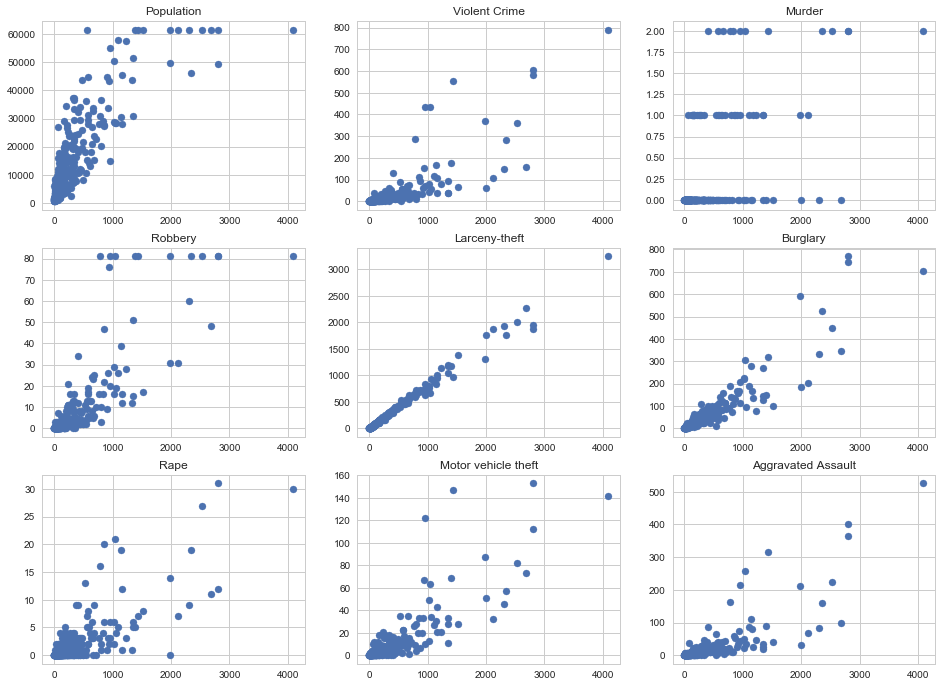

In [111]:
plt.figure(figsize=(16,16))

#Population
plt.subplot(4, 3, 1)
plt.scatter(outcome, data['Population'])
plt.title('Population')

#Violent crime
plt.subplot(4, 3, 2)
plt.scatter(outcome, data['Violent crime'])
plt.title('Violent Crime')

#Murder
plt.subplot(4, 3, 3)
plt.scatter(outcome, data['Murder'])
plt.title('Murder')

#Robbery
plt.subplot(4, 3, 4)
plt.scatter(outcome, data['Robbery'])
plt.title('Robbery')

#Larceny-Theft
plt.subplot(4, 3, 5)
plt.scatter(outcome, data['Larceny-theft'])
plt.title('Larceny-theft')

#Burglary
plt.subplot(4, 3, 6)
plt.scatter(outcome, data['Burglary'])
plt.title('Burglary')

#Rape
plt.subplot(4, 3, 7)
plt.scatter(outcome, data['Rape'])
plt.title('Rape')

#Motor vehicle theft
plt.subplot(4, 3, 8)
plt.scatter(outcome, data['Motor vehicle theft'])
plt.title('Motor vehicle theft')

#Aggravated Assault
plt.subplot(4, 3, 9)
plt.scatter(outcome, data['Aggravated Assault'])
plt.title('Aggravated Assault')

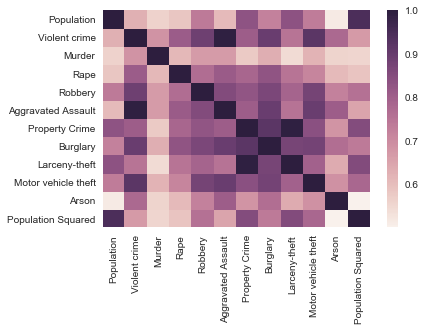

In [124]:
sns.heatmap(data.corr())

#### Multivariate Normality

In [122]:
data.fillna(0)
data.head()

,City,Population,Violent crime,Murder,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,Population Squared
0,Adams Village,1861.000,0.000,0,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000,3463321.000
1,Addison Town and Village,2577.000,3.000,0,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000,6640929.000
2,Akron Village,2846.000,3.000,0,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000,8099716.000
3,Albany,61686.000,791.000,2,30.000,81.000,526.000,4090.000,705.000,3243.000,142.000,nan,3805162596.000
4,Albion Village,6388.000,23.000,0,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan,40806544.000


In [123]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()

#Need to split data because R sqaured is 1, which means the data is overfitting.


Y = data['Property Crime'].values.reshape(-1, 1)
X = data[['Population','Violent crime','Robbery','Burglary',
              'Larceny-theft','Motor vehicle theft','Aggravated Assault']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  8.95678462e-17   4.81543491e-16  -2.63667784e-15   1.00000000e+00
    1.00000000e+00   1.00000000e+00  -1.34675797e-15]]

Intercept: 
 [ -1.19371180e-12]

R-squared:
1.0


R-Squared is 1, which means that the data is overfitted.

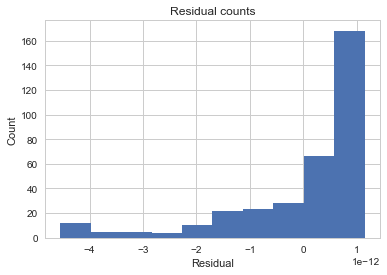

In [126]:
#Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Property Crime']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

The residuals are not normal. So there is a couple problems. The data is overfitted and the residuals are not normal.

### Fixing Issues

To deal with the overfitting will try various approaches:

1. Use Cross Validation
2. Remove features


In [130]:
Y = data['Property Crime'].values.reshape(-1, 1)
X = data[['Population','Violent crime','Robbery','Burglary',
              'Motor vehicle theft','Aggravated Assault']]

In [131]:
from sklearn.model_selection import cross_val_score

regr = linear_model.LinearRegression()

print(cross_val_score(regr, X, Y ,cv=10))


[ 0.85979983  0.88107967  0.85552303  0.87549921  0.89715746  0.90942016
  0.81998095  0.8396319   0.91814119  0.9022651 ]


In [136]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(regr, X, Y).ravel()

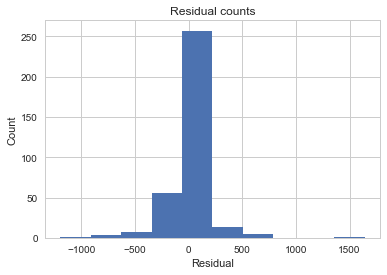

In [137]:
#Extract predicted values.

actual = data['Property Crime']

# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()